# Running 'ellipse' with sigma-clipping:

In this session, we execute the basic fitting demonstrated in the 'example1' notebook, with the main difference that the fit is performed with sigma-clipping.

We start in the same way:

In [1]:
from astropy.io import fits
image = fits.open("../../test/data/M51.fits")
pixel_data = image[0].data

from ellipse.ellipse import Ellipse
ellipse = Ellipse(pixel_data)

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0


Sigma-clipping is implemented via parameters of the 'fit_image' method. In this example, due to the significant contamination of the image by non-elliptical features, we apply quite aggressive clipping.

In [2]:
isophote_list = ellipse.fit_image(sclip=2., nclip=3)

#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1094.42 ( 8.44)  0.111 (0.007)  64.68 ( 1.7)  0.190    58     1   20     0
  11.00     1048.76 ( 7.36)  0.163 (0.005)  62.35 ( 1.0)  0.164    59     4   10     0
  12.10      989.97 ( 6.35)  0.163 (0.003)  72.48 ( 0.6)  0.116    62     7   10     0
  13.31      924.37 ( 6.97)  0.181 (0.004)  63.62 ( 0.7)  0.152    70     5   13     0
  14.64      895.86 ( 7.22)  0.139 (0.005)  25.70 ( 1.0)  0.164    78     7   18     0
  16.11      871.67 ( 7.69)  0.200 (0.004)  33.95 ( 0.6)  0.143    82     8   19     0
  17.72      764.53 ( 5.34)  0.053 (0.003)  39.51 ( 1.1)  0.092    85    23   24     0
  19.49      728.14 ( 4.55)  0.146 (0.002)  32.98 ( 0.3)  0.088    86    26   50     2
  21.4

Note how the added stability provided by sigma-clipping allows the fit to proceed further outwards before sensing a too low signal-to-noise condition.

### Plotting results

Similar to what we did before in notebook 'example1':

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

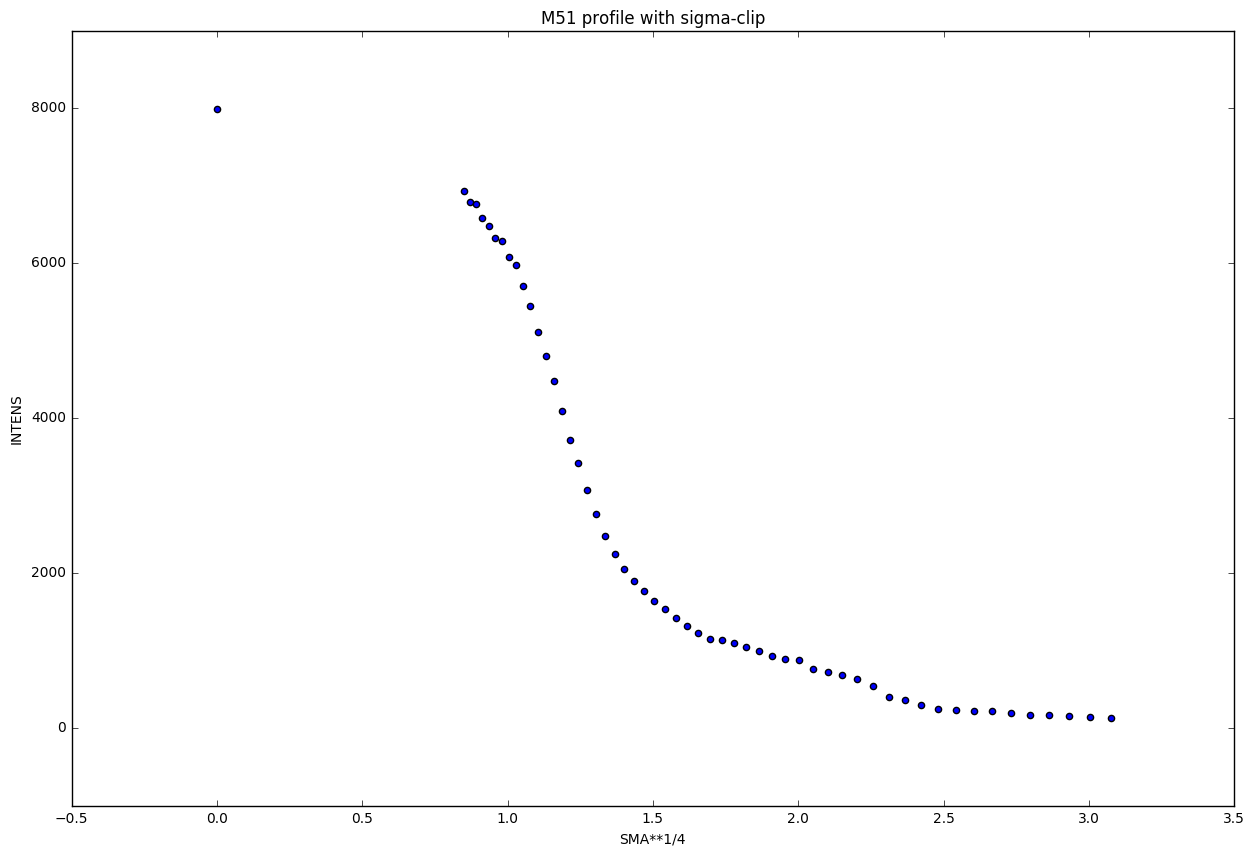

In [4]:
plt.scatter(isophote_list.sma**0.25, isophote_list.intens)

plt.xlabel('SMA**1/4')
plt.ylabel('INTENS')
plt.title("M51 profile with sigma-clip")

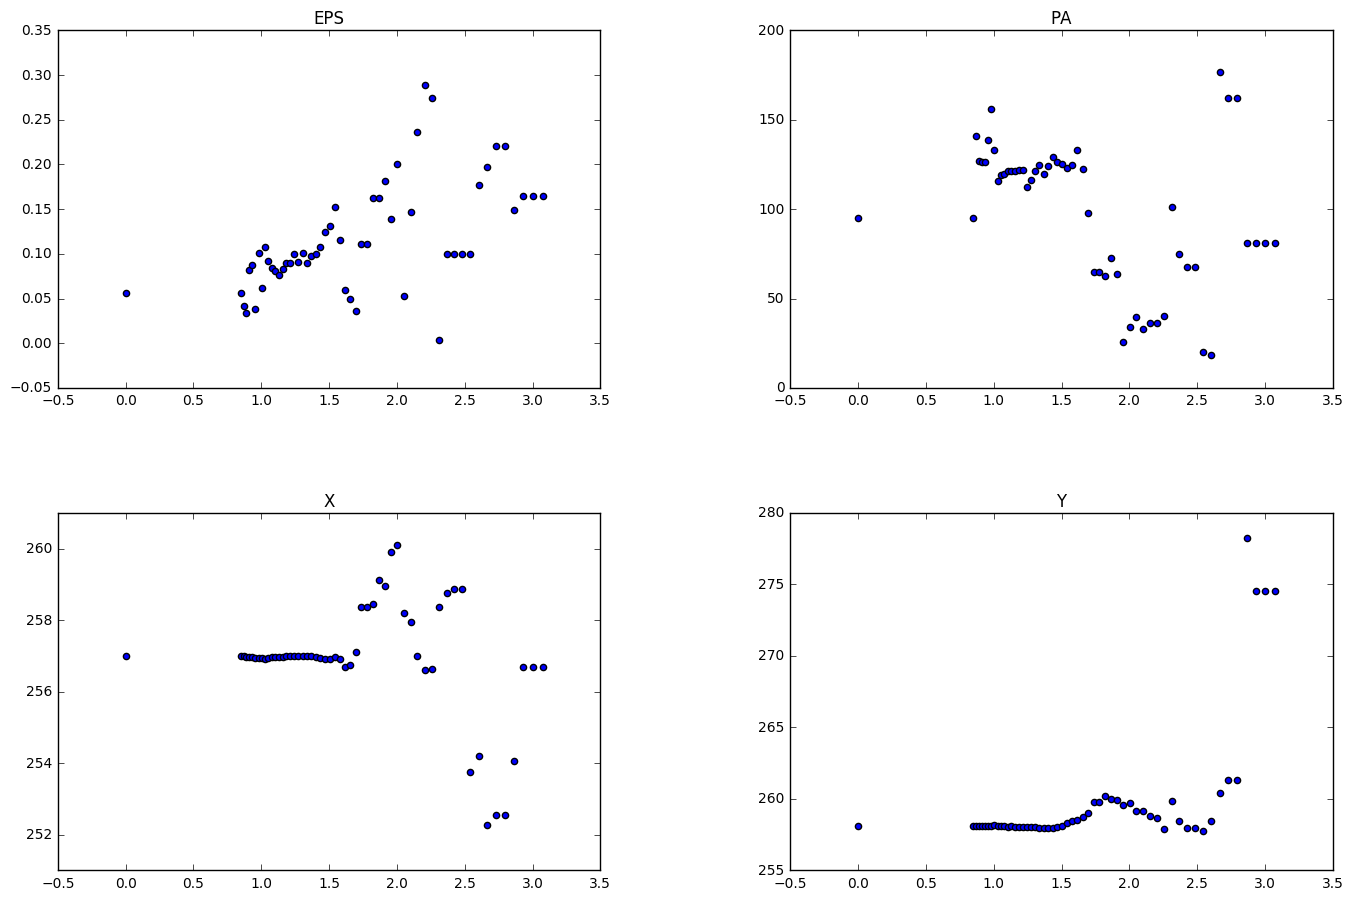

In [5]:
plt.figure(1)

plt.subplot(221)
plt.scatter(isophote_list.sma**0.25, np.array([s.geometry.eps for s in isophote_list.sample]))
plt.title('EPS')

plt.subplot(222)
plt.scatter(isophote_list.sma**0.25, np.array([s.geometry.pa/np.pi*180. for s in isophote_list.sample]))
plt.title('PA')

plt.subplot(223)
plt.scatter(isophote_list.sma**0.25, np.array([s.geometry.x0 for s in isophote_list.sample]))
plt.title('X')

plt.subplot(224)
plt.scatter(isophote_list.sma**0.25, np.array([s.geometry.y0 for s in isophote_list.sample]))
plt.title('Y')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

Overplot several isophotes on the image display:

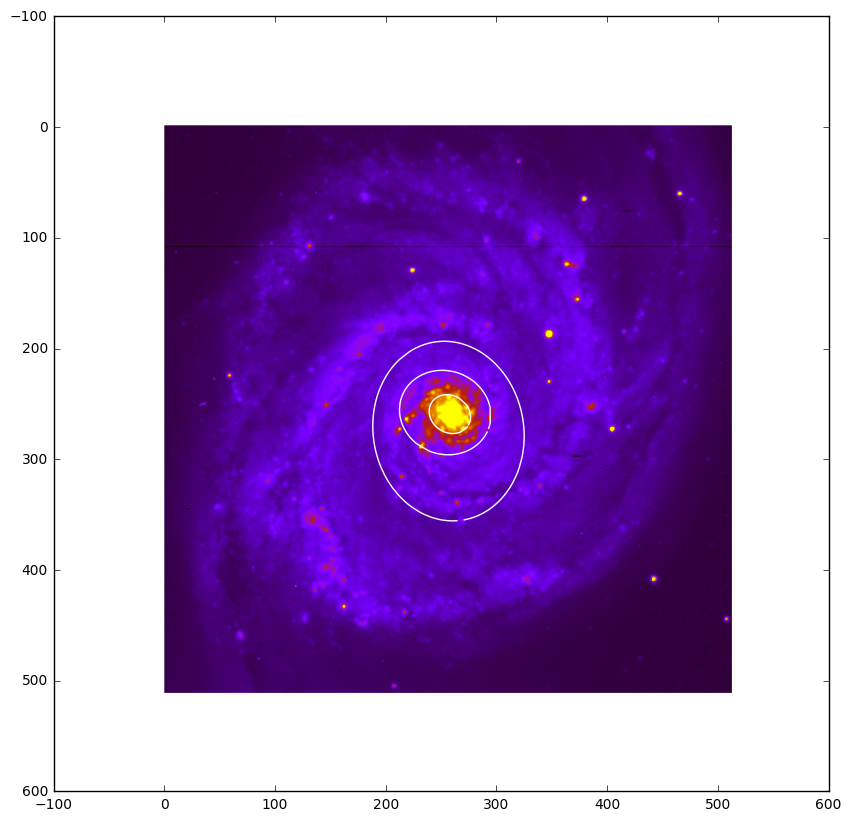

In [6]:
import matplotlib.cm as cm

fig, ax = plt.subplots()
ax.imshow(pixel_data, cmap=cm.gnuplot, vmin=0, vmax=1000)

iso1 = isophote_list.get_closest(20.)
iso2 = isophote_list.get_closest(40.)
iso3 = isophote_list.get_closest(80.)

x, y, = iso1.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
plt.plot(x, y, color='white')

Brightness samples associated with the three isophotes above are plotted next. 

Note that the angles in the raw sample arrays are defined w.r.t the semi-major axis position angle. To plot everything in the same coordinate system, we have to offset each isophote's angles array by the corresponding position angle.

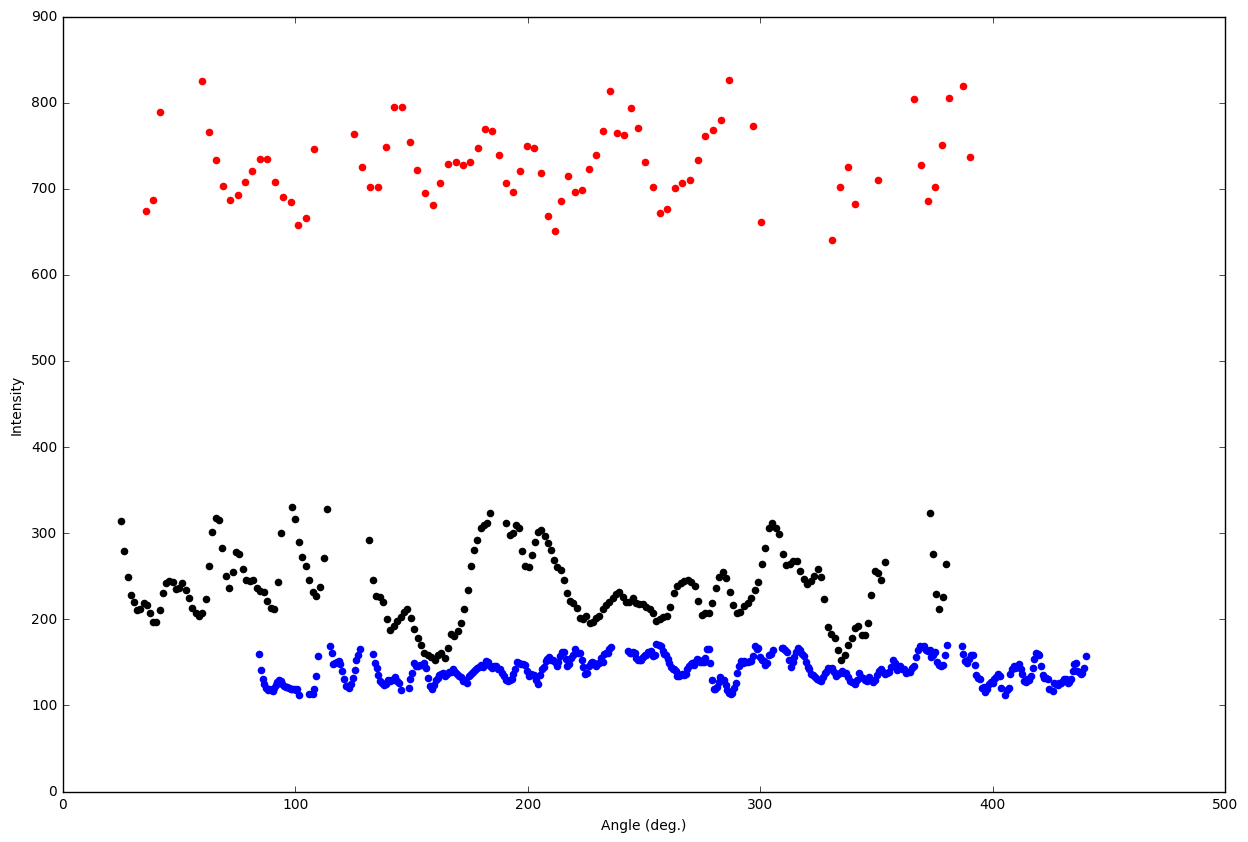

In [7]:
plt.scatter((iso1.sample.values[0]+iso1.sample.geometry.pa)/np.pi*180., iso1.sample.values[2], color='red')
plt.scatter((iso2.sample.values[0]+iso2.sample.geometry.pa)/np.pi*180., iso2.sample.values[2], color='black')
plt.scatter((iso3.sample.values[0]+iso3.sample.geometry.pa)/np.pi*180., iso3.sample.values[2], color='blue')

plt.ylabel("Intensity")
plt.xlabel("Angle (deg.)")

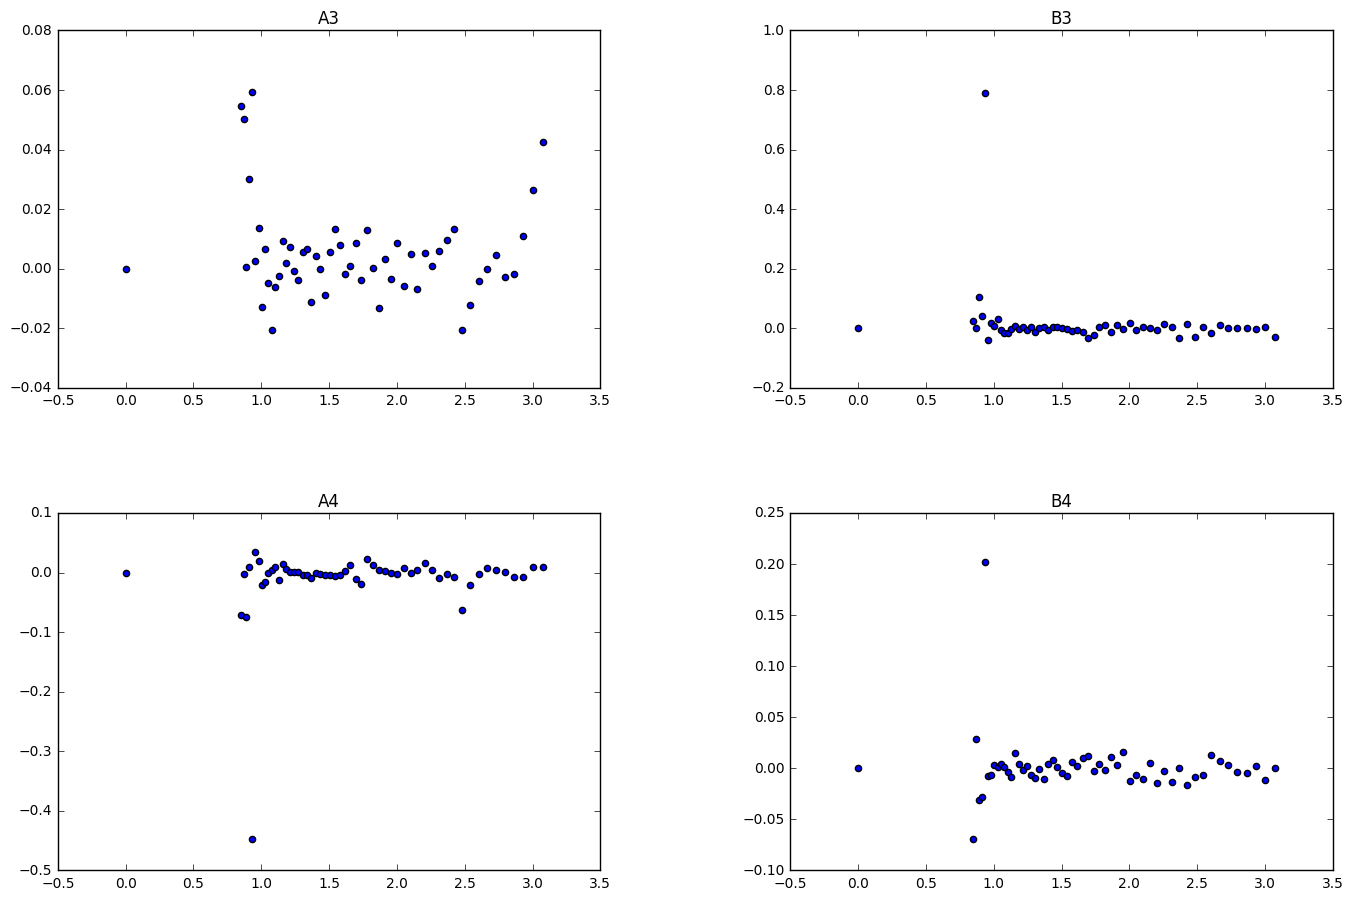

In [8]:
plt.figure(1)

plt.subplot(221)
plt.scatter(isophote_list.sma**0.25, isophote_list.a3)
plt.title('A3')

plt.subplot(222)
plt.scatter(isophote_list.sma**0.25, isophote_list.b3)
plt.title('B3')

plt.subplot(223)
plt.scatter(isophote_list.sma**0.25, isophote_list.a4)
plt.title('A4')

plt.subplot(224)
plt.scatter(isophote_list.sma**0.25, isophote_list.b4)
plt.title('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)